In [1]:
%pip install minisom

# Import required libraries
import math
from minisom import MiniSom
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pandas as pd  # loading data in table form
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize  # machine learning algorithm library
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import svm


# Library settings
pd.set_option('display.max_columns', 60)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=142d481895524c6a82d7566fe4262f8f6ffbeac8177ec455fd9e8a4a173b5741
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


# **A. Opis zbiorów danych.**

**Covertype Data Set**

Typ atrybutów: Kategoryczny, Integer. <br>
Liczba atrybutów: 54 <br>
Zgubione wartości: 0 <br>
Rodzaj danych: Dyskretne <br>

Zbiór danych służy do przewidywania typu pokrycia leśnego na podstawie następujących atrybutów:
*   Wysokość
*   Wygląd/Aspekt
*   Nachylenie
*   Pozioma odległość od wody
*   Pionowa odległość od wody
*   Pozioma odległość od jezdni
*   Zacienienie o 9:00
*   Zacienienie o 12:00
*   Zacienienie o 15:00
*   Pozioma odległość do punktów zapłonu
*   Dziekie tereny (4 binarne kolumny)
*   Typy ziemii (40 binarnych kolumn)
*   7 typów pokrycia leśnego

Dane są w postaci surowej, nie były skalowane.
Wszystkie dane zostały uzyskane od instytucji znajdujących się w USA i dotyczą czterech obszarów dzikiej przyrody znajdujących się w Roosevelt National Forest w północnym Kolorado. Obszary te zostały wybrane ze względu na to, że nie znajdziemy tam dużej ingerencji człowieka, zatem wygląd tych terenów i typy pokrycia leśnego są wynikiem przemian naturalnych.

Najlepsze i najbardziej typowe dla całego zbiory danych są obszary Rawah oraz Comanche Peak, ponieważ posiadają wiele gatunków drzew i lepszy zakres wartości zmiennych predykcyjnych takich jak np. wyokość. Skłąd gatunkowy pozostałych dwóch obszarów jest nieco bardziej ubogi.

<br>
<br>

**Credit Approval Data Set**

Typ atrybutów: Kategoryczny, Continuous, Integer. <br>
Liczba atrybutów: 15 <br>
Liczba instancji: 690 <br>
Zgubione wartości: występują <br>
Rodzaj danych: Mieszane <br>

Zbiór danych służy do rozpatrywania wniosków o karty kredytowe na podstawie następujących atrybutów:

* A1: b, a. 
* A2: continuous. 
* A3: continuous. 
* A4: u, y, l, t. 
* A5: g, p, gg. 
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
* A7: v, h, bb, j, n, z, dd, ff, o. 
* A8: continuous. 
* A9: t, f. 
* A10: t, f. 
* A11: continuous. 
* A12: t, f. 
* A13: g, p, s. 
* A14: continuous. 
* A15: continuous. 
* A16: +,- (class attribute)

Nazwy i wartości wszystkich atrybutów zostały zmienione na nic nieznaczące symbole w celu ochrony poufności danych. W zbiorze danych znajdują się atrybuty kategoryczne, ciągłe oraz typu całkowitego o dużych i małych wartościach. Zbiór danych powstał w calach klasyfikacyjnych i posiada 15 atrybutów z 690 instancjami w którym występują brakujące dane.


## **Wczytywanie zbiorów danych**

In [2]:
#  Load dataset 1
print("Dataset 1 - forest covertype:\n")
covtype_colnames = ['Elevation', 'Aspect', 'Slope', 'Dist_to_water_hor', 'Dist_to_water_ver', 'Hillshade_9am', 'Hillshade_Noon',
                    'Hillshade_3pm', 'Dist_to_fire', ] + [f'Wilderness_{i}' for i in range(4)] + [f'Soil_{i}' for i in range(40)] + ['Cover_Type']
covtype_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz",
                              compression='gzip', header=None, names=covtype_colnames)
covtype_dataset.head()

Dataset 1 - forest covertype:



,Elevation,Aspect,Slope,Dist_to_water_hor,Dist_to_water_ver,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Dist_to_fire,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3,Soil_0,Soil_1,Soil_2,Soil_3,Soil_4,Soil_5,Soil_6,Soil_7,Soil_8,Soil_9,Soil_10,Soil_11,Soil_12,Soil_13,Soil_14,Soil_15,Soil_16,Soil_17,Soil_18,Soil_19,Soil_20,Soil_21,Soil_22,Soil_23,Soil_24,Soil_25,Soil_26,Soil_27,Soil_28,Soil_29,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
#  Load dataset 2
credit_colnames = [f'A{i}' for i in range(1,17)]
credit_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None, names=credit_colnames)
print("Dataset 2 - credit screening:\n")
credit_dataset.head()

Dataset 2 - credit screening:



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## **Wizualizacja danych**

1)

Oś pionowa: pionowa odległość od wody

Oś pozioma: pozioma odległość od wody

Z pierwszego wykresu wynika że gleby w znacznym stopniu zmieniają się ze względu na poziomą odłegość od wody. Zmieniają się one także wraz ze wzrostem odległości pionowej od wody jednak wciąż różne typy gleby występują na znacznych odległościach pionowych. Natomiast na wyższych odległościach poziomych przechodzą one w inny typ gleby.

2)

Oś pionowa: odległość od punktów ogniowych

Oś pozioma: Wysokość

Większe znaczenie w tym wypadku ma odległość od punktów ogniowych. Na wykresie drugim widać że na różnych wysokościach wciąż występują te same typy gleb. Zmieniają się one wraz ze wzrostem odległości od punktów ogniowych. Dla niskich wartości tego parametru jesteśmy w stanie przewidzieć że gleba będzie typu 5, 6, 4, 3 lub 7. Dla wyższych wartości natomiast przeważają typy gleb o numerach 1 oraz 2.

3)

Oś pionowa: nachylenie

Oś pozioma: zacienienie obszaru w południe

Na tym wykresie możemy zaobserwować jak typ gleby zależy od poziomu zacienienia w południe. Wraz ze wzrostem zacienienia typ gleby się zmienia. Na początku są to gleby typu 2, które następnie przechodzą w gleby typu 1, 3, 6 i 7. Oczywiście wciąż występuję gleby typu 2 czy 4 jednak w porównaniu do pozostałych typów są one w mniejszości.

4)

Oś pionowa: zacienienie o 15:00

Oś pozioma: zacienienie o 9:00

Tym razem możemy obserwować zmiany typu gleby w związku ze wzrostem zacienienia o godzinie 15:00 oraz 9:00. Widzimy że wraz ze wzrostem zacienienia o konkretnych godzinach zmieniają się typy gleb poczawszy od wymieszanych ze sobą typów 1 i 2, a kończąc na typie 7.

Z 4 przygotowanych wykresów wynika że w znacznym stopniu w przewidywaniach będą przeważać typy 2 oraz 7 podczas gdy pozostałych typów gleb będzie mniej, natomiast typ 4 występuje w bardzo małych ilościach.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

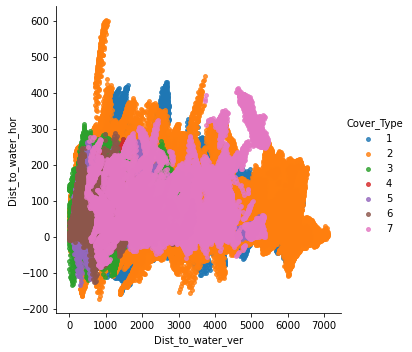

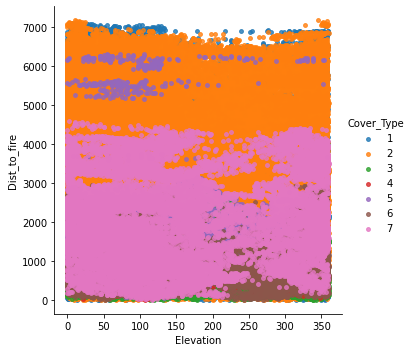

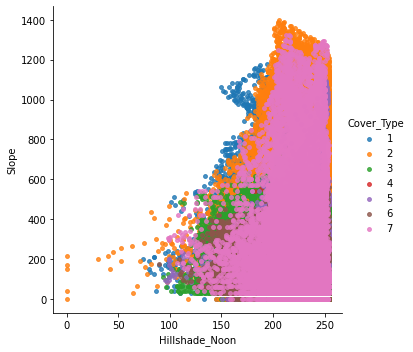

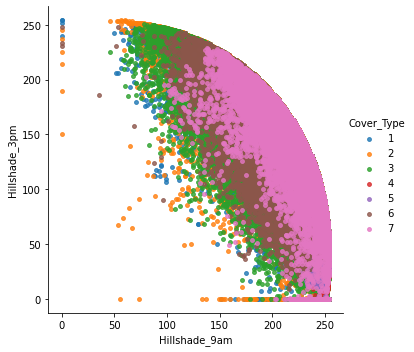

In [ ]:
sns.lmplot('Dist_to_water_ver', 'Dist_to_water_hor',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Elevation', 'Dist_to_fire',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Hillshade_Noon', 'Slope',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Hillshade_9am', 'Hillshade_3pm',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

W przypadku zbioru Credit Approval nazwy kolumn nic nie znaczą, więc w celu wizualizacji tych danych które są numeryczne po prostu sporządzono wykresy każdej kolumny z każdą, co w wyniku dało nam 6 wykresów znajdujących się poniżej.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

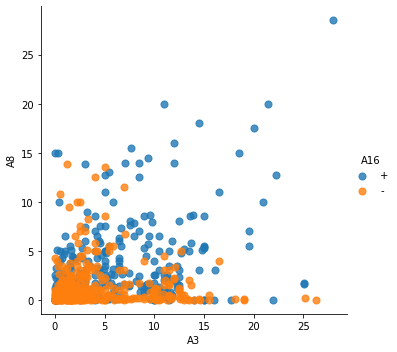

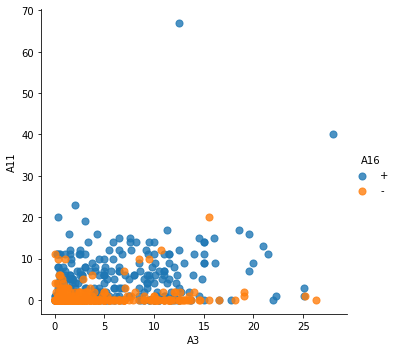

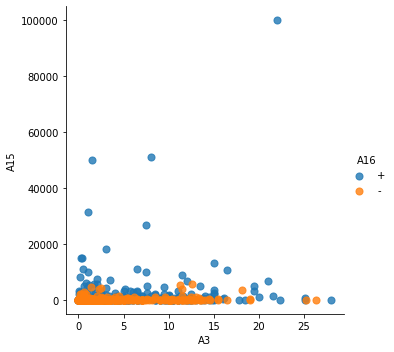

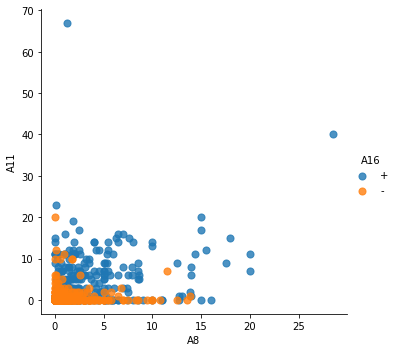

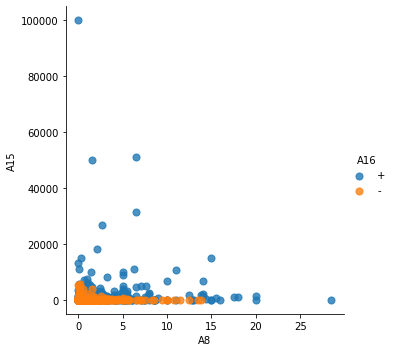

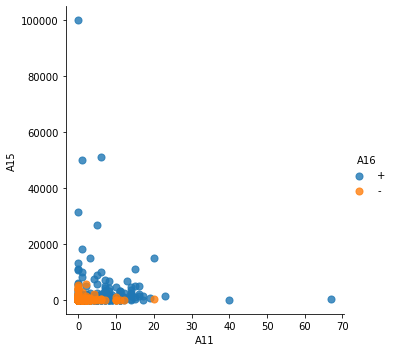

In [ ]:
A = ['A3', 'A8', 'A11', 'A15']
for i in range(len(A)):
    for j in range(len(A)):
        if i >= j:
            pass
        else:
            sns.lmplot(A[i], A[j],
                    data=credit_dataset,
                    fit_reg=False,
                    hue="A16",
                    scatter_kws={"marker": "D",
                                    "s": 50})

# **B. Przygotowanie danych.**

Przygotowanie danych dotyczące zbioru danych covtype. Podział na zbiór treningowy i zbiór testowy. Na początku zastąpiliśmy 7 za pomocą 0, aby ułatwić dalsze działania. Następnie podzieliliśmy dane na konkretne wartości oraz ich tabele. Teraz możemy rozdzielić zbiór danych na zbiory testowy oraz zbiór którego użyjemy do trenowania. Wspólnie zdecydowaliśmy, że podobnie jak w przypadku zbioru dotyczącego irysów podzielimy nasz zbiór covtype losowo aby uzyskać bardziej zróżnicowane wyniki. Dodatkowo nasz zbiór, którego użylismy do przetestowania naszej sieci jest wielkości 20% zbioru początkowego. Na koniec przetransmofrmowaliśmy nasze tabele do jednego wektora, aby kolejny raz ułatwić sobie pracę.


In [4]:
# replace 7 with 0 to transform covtypes from 1-7 to 0-6
covtype_dataset.loc[covtype_dataset["Cover_Type"] == 7, "Cover_Type"] = 0

# split into data and labels
covtype_X = covtype_dataset.iloc[:, 0:-1].values
covtype_y = covtype_dataset.iloc[:, -1].values
covtype_X = normalize(covtype_X, axis=0)

# split into test set and training set
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.20, random_state=31)


covtype_y_train_noOHE = covtype_y_train
covtype_y_test_noOHE = covtype_y_test
# transform labels to OHE
covtype_y_train = np_utils.to_categorical(covtype_y_train, num_classes=7)
covtype_y_test = np_utils.to_categorical(covtype_y_test, num_classes=7)

Przygotowanie danych dotyczące zbioru danych credit approval. Nasze przygotowywanie danych dla drugiego zbioru danych rozpoczęliśmy od usunięcia brakujących wartości, aby nasz drugi zbiór był bardziej kompletny. Następnie podzieliliśmy dane na dane numeryczne i kategoryczne. Ten podział był konieczny, aby następnie możliwa była zamiana danych kategorycznych na 0 lub 1 w zależności od nich samych. Dzięki takim działaniom otrzymaliśmy jedną grupe atrybutów czyli atrybuty numeryczne. Teraz usunęliśmy zduplikowane atrybuty żeby nie powtarzały się one bez potrzeby. Kolejny krok to zamiana typow numerycznych na typy float oraz kolejny raz transformacja naszych danych tak, aby utworzyć z nich jeden wektor. Teraz dodajemy wartość, którą chcemy przewidzieć do ostatniej kolumny. Dalsze działania są takie same jak dla pierwszego zbioru danych. Dzielimy nasz zbiór podstawowy na zbiór testowy oraz uczący. Kolejny raz zbiór testowy ma wielkość 20% zbioru podstawowego.

In [5]:
# remove missing values
credit_dataset = credit_dataset.replace('?', np.NaN)
credit_dataset = credit_dataset.dropna()

# divide attributes to numerical and categorical
credit_dataset_num = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
credit_dataset_cat = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

'''
# replace two-value categorical attributes to 0 and 1, adding them to numerical attributes
for i in credit_dataset_cat:
    if len(credit_dataset[i].unique()) == 2:
        credit_dataset[i] = credit_dataset[i].replace(['a', 't', '+'], 1)
        credit_dataset[i] = credit_dataset[i].replace(['b', 'f', '-'], 0)
        credit_dataset[i] = credit_dataset[i].astype('int')
        credit_dataset_num.append(i)
'''

# convert + to 1 and - to 0
credit_dataset['A16'] = credit_dataset['A16'].replace(['+'], 1)
credit_dataset['A16'] = credit_dataset['A16'].replace(['-'], 0)
credit_dataset['A16'] = credit_dataset['A16'].astype('int')

# remove duplicated attributes
for i in credit_dataset_num:
    if i in credit_dataset_cat:
        credit_dataset_cat.remove(i)

# changing type of numerical attributes to float
for i in credit_dataset_num:
    if credit_dataset[i].dtypes == object:
        credit_dataset[i] = credit_dataset[i].astype('float')

# transform labels to OHE
for i in credit_dataset.columns:
    if credit_dataset[i].dtypes == object:
        y = pd.get_dummies(credit_dataset[i], prefix=i)
        credit_dataset = credit_dataset.drop(columns=i)
        credit_dataset = pd.concat([credit_dataset, y], axis=1)

# putting attribute that we want to predict to last column
cols = credit_dataset.columns.to_list()
cols.remove('A16')
cols.append('A16')

credit_dataset = credit_dataset[cols]

# split into data and labels
credit_X = credit_dataset.iloc[:, 0:-1].values
credit_y = credit_dataset.iloc[:, -1].values
credit_X = normalize(credit_X, axis=0)

# split into test set and training set
credit_X_train, credit_X_test, credit_y_train, credit_y_test = train_test_split(credit_X, credit_y, test_size=0.20, random_state=31)


credit_y_train_noOHE = credit_y_train
credit_y_test_noOHE = credit_y_test
# transform boolean to 2-column to OHE
credit_y_train = np_utils.to_categorical(credit_y_train, num_classes=2)
credit_y_test = np_utils.to_categorical(credit_y_test, num_classes=2)

# **C-F. Struktura, uczenie, wyniki oraz parametry sieci**


### Sieci FFNN

Jako pierwszą sieć, którą należało utworzyć wybraliśmy sieć FNN. Ten rodzaj sieci wygląda następująco:

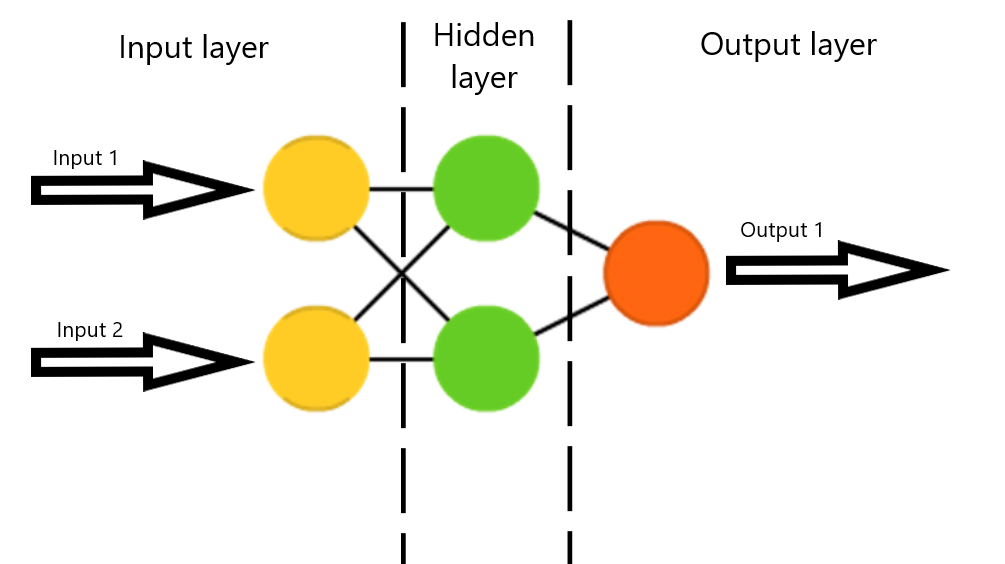

Najprościej mówiąć sieć ta jest bardzo prosta, a mianowicie przekazuje informacje od przodu do tyłu. Posiada ona trzy wartstwy. Warstwę wejściową, ukrytą i wyjściową. Warstwa sama ze sobą nie posiada połączeń, a komórki wewnątrz warstw są ułożone do siebie równolegle. Każda wartstwa jest w pełni połączona z wartstwą sąsiadującą. Na rysunku przedstawiliśmy najprostszą wersję sieci FFNN tj. zawierającą dwie komórki w wartstwie wejściowej, dwie komórki w wartstwi ukrytej i jedną w wartstwie wyjściowej. Liczba wartstw ukrytych i umieszczonych w nich komórek jest inna dla każdej z naszych sieci.


### Sieć FFNN dla datasetu *covtype*:

Dla pierwszego datasetu utworzyliśmy sieć FFNN, która jest podobna do tej na rysunku jednakże zawiera ona dwie wartstwy ukryte, po 200 neuronów w każdej.

In [ ]:
# sieć dla covtype

# create NN
covtype_NN_model = Sequential()
covtype_NN_model.add(Dense(53, input_dim=53, activation='relu'))  # the input layer
covtype_NN_model.add(Dense(200, activation='relu'))  # the hidden layer
covtype_NN_model.add(Dense(200, activation='relu'))  # the hidden layer
covtype_NN_model.add(Dropout(0.2))  # Protects against overfitting
covtype_NN_model.add(Dense(7, activation='softmax'))  # the output layer
covtype_NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
covtype_NN_model.fit(covtype_X_train, covtype_y_train, validation_data=(covtype_X_test, covtype_y_test), batch_size=20, epochs=100, verbose=1)


# predict values from test set, measure accuracity
prediction = covtype_NN_model.predict(covtype_X_test)
length = len(prediction)
y_label = np.argmax(covtype_y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)

Epoch 1/100
23241/23241 [==============================] - 103s 4ms/step - loss: 0.8142 - accuracy: 0.6216 - val_loss: 0.7635 - val_accuracy: 0.6476
Epoch 2/100
23241/23241 [==============================] - 95s 4ms/step - loss: 0.7652 - accuracy: 0.6470 - val_loss: 0.7488 - val_accuracy: 0.6523
Epoch 3/100
23241/23241 [==============================] - 96s 4ms/step - loss: 0.7473 - accuracy: 0.6537 - val_loss: 0.7431 - val_accuracy: 0.6525
Epoch 4/100
23241/23241 [==============================] - 96s 4ms/step - loss: 0.7301 - accuracy: 0.6607 - val_loss: 0.7166 - val_accuracy: 0.6644
Epoch 5/100
23241/23241 [==============================] - 95s 4ms/step - loss: 0.7101 - accuracy: 0.6715 - val_loss: 0.6906 - val_accuracy: 0.6835
Epoch 6/100
23241/23241 [==============================] - 103s 4ms/step - loss: 0.6896 - accuracy: 0.6833 - val_loss: 0.6694 - val_accuracy: 0.6915
Epoch 7/100
23241/23241 [==============================] - 95s 4ms/step - loss: 0.6714 - accuracy: 0.6921 - va

Eksperymenty ze strukturą sieci polegały głownie na modyfikowniu metodą prób i błędów ilości warstw ukrytych oraz ilości neuronów w tych warstwach.

Dla tej sieci najlepszą strukturą okazały się być 2 warstwy ukryte po 200 neuronów. Zmiejszenie lub zwiększenie liczby warstw powodowało pogorszenie wyniku. Zmniejszenie liczby neuronów powodowało pogorszenie wyniku, a nawet ich ponad dwukrotne zwiększenie (do 500) nie spowodowało zmiany wyniku ponad wachanie związane z losowym uczeniem, jedynie znacznie wydłużyło czas poczebny do nauku.

Spróbowaliśmy także zmiany funkcji aktuwacji, z "relu" na "sigmoid", jednak spowodowała ona jedynie drastyczny spadek dokładności sieci (do 47%).

Dla najlepszej struktury, przy 100 epokach nauki, sieci udało się osiągnąć dokładność w okolicy 80%. Jest to o wiele lepiej, niż statystyczna dokładność losowego wyboru jednej z 7 kategorii (14%).

Dane dla tej sieci są na prawdę olbrzymie (580 tysięcy rekordów) i możliwe że udałoby się uzyskać większą precyzję przy zwiększeniu epok nauki, jednak w związku z z mocą obliczeniową darmowego runtime google collaba, byłoby to związane z czasem nauki przechodzącym w dziesiątki godzin.

### Sieć FFNN dla datasetu *credit*:

Dla drugiego zbioru danych zastosowaliśmy sieć składającą się z jednej warstwy ukrytej złożonej z 50 neuronów.

In [ ]:
# sieć dla credit

# create NN
credit_NN_model = Sequential()
credit_NN_model.add(Dense(46, input_dim=46, activation='relu'))  # the input layer
credit_NN_model.add(Dense(50, activation='relu'))  # the hidden layer
credit_NN_model.add(Dropout(0.2))  # Protects against overfitting
credit_NN_model.add(Dense(2, activation='softmax'))  # the output layer
credit_NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
credit_NN_model.fit(credit_X_train, credit_y_train, validation_data=(credit_X_test, credit_y_test), batch_size=20, epochs=100, verbose=1)

# predict values from test set, measure accuracity
credit_prediction = credit_NN_model.predict(credit_X_test)
length = len(credit_prediction)
credit_y_label = np.argmax(credit_y_test, axis=1)
credit_predict_label = np.argmax(credit_prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(credit_y_label == credit_predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)

Epoch 1/100
27/27 [==============================] - 1s 15ms/step - loss: 0.6852 - accuracy: 0.5632 - val_loss: 0.6742 - val_accuracy: 0.5878
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6591 - accuracy: 0.6839 - val_loss: 0.6439 - val_accuracy: 0.7176
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.8065 - val_loss: 0.5845 - val_accuracy: 0.7939
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5175 - accuracy: 0.8429 - val_loss: 0.4986 - val_accuracy: 0.8092
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.8602 - val_loss: 0.4381 - val_accuracy: 0.8168
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.8697 - val_loss: 0.4108 - val_accuracy: 0.8244
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.8602 - val_loss: 0.4027 - val_accuracy: 0.8168
Epoch 8/100


Eksperymenty ze strukturą sieci polegały głownie na modyfikowniu metodą prób i błędów ilości warstw ukrytych oraz ilości neuronów w tych warstwach.

Dla tej sieci najlepszą strukturą okazała się być 1 warstwa ukryta złożona z 50 neuronów. Zwiększenie liczby warstw powodowało pogorszenie wyniku. Zmniejszenie, lub zwiększenie liczby neuronów także powodowało pogorszenie wyniku.

Spróbowaliśmy także zmiany funkcji aktuwacji, z "relu" na "sigmoid", jednak spowodowała ona jedynie drastyczny spadek dokładności sieci (poniżej 50%).

Dla najlepszej struktury, przy 100 epokach nauki, sieci udało się osiągnąć dokładność w okolicy 90%. Jest stosunkowo dobry wynik i także dużo lepszy niż prawdopodobnieństwo 50% przy losowym wyborze.

Wygląda na to, że ze względu na fakt, że większość danych w datasecie jest danymi kategorycznymi, sieć jest prosta do nauki, ale też dosyć podatna na przetrenowanie przy zbyt dużej liczbie neuronów.

#### Krzywa ROC dla *credit*:

Dla datasetu *credit* predykcję można sprowadzić do odpowiedzi "tak" lub "nie", można więc dla odpowiadającej mu sieci zwizualizować krzywą ROC

5/5 [==============================] - 0s 3ms/step


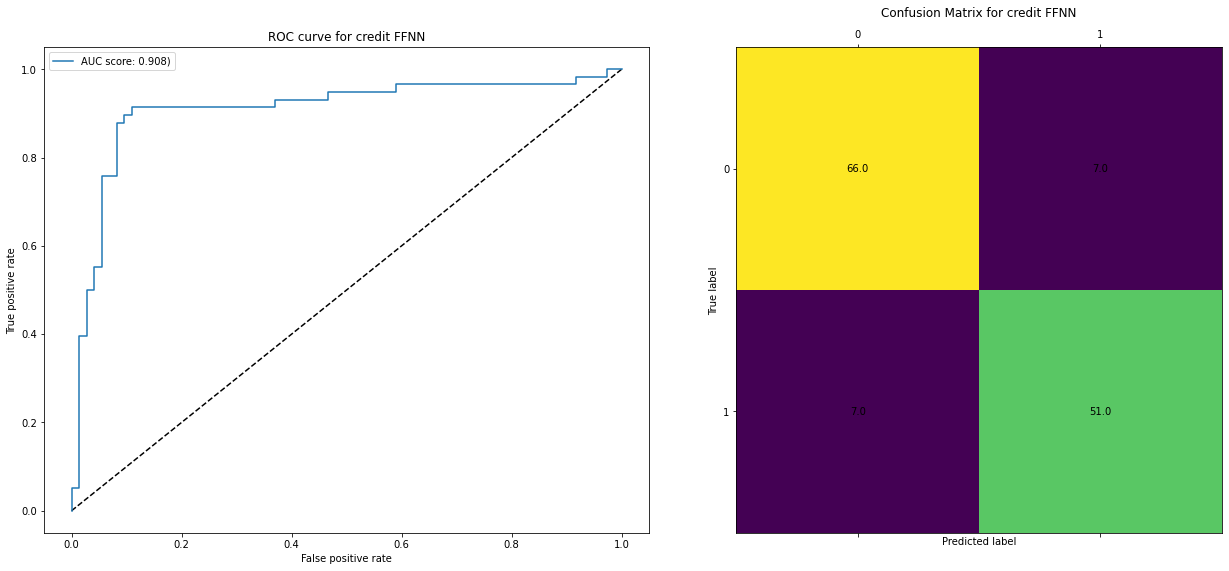

In [ ]:
# Krzywa ROC dla credit
credit_probabilities = credit_NN_model.predict(credit_X_test)[::,1]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(credit_y_test_noOHE, credit_probabilities)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC score: {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for credit FFNN')
plt.legend(loc='best')

mtx = confusion_matrix(credit_y_label, credit_predict_label)
ax = plt.subplot(1, 2, 2)
ax.matshow(mtx)
for (i, j), z in np.ndenumerate(mtx):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for credit FFNN')

plt.tight_layout()
plt.show()


Jak widać, krzywa ROC jest wykrzywiona wysoko ponad bazę lini prostej, co potwierdza wysoką dokładność przewidywań za pomocą tej sieci.

### Sieci SOM

Druga sieć dla wybranych zbiorów danych to sieć SOM czyli Self-Organized Map. Jej struktura wygląda następująco:

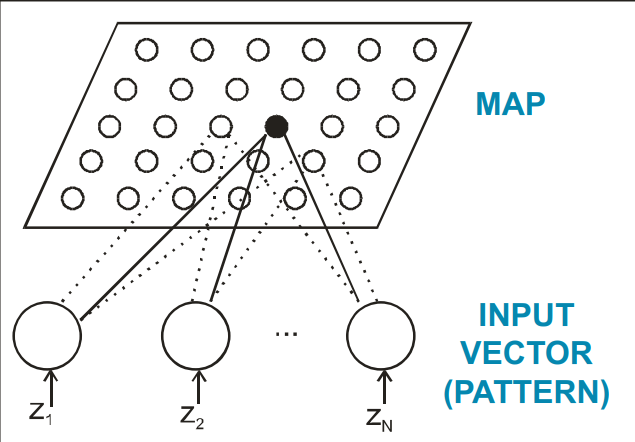

SOM to samoorganizująca się mapa obiektów. Jest to nienadzorowana technika uczenia maszynowego, która używana jest do tworzenia niskowymiarowej reprezentacji zbioru o wyższych wymiarach przy zachowaniu odpowiedniej struktury danych. Na przykład mając dany wielowymiarowe tj. zmienne, które zmierzyliśmy w jakichś obserwacjach, może pogrupować je w pewne skupiska tak, aby miałt one podobne wartości. W ten sposó uzyskujemy klastry, które z kolei możemy zwizualizować jako dwuwymiarową "mapę". Tak właśnie działają sieci SOM.

### Sieć SOM dla datasetu *covtype*:

Ten zbiór danych zawiera bardzo dużo rekordów, przez co nie da się ich w przejrzysty sposób wyświetlić na wykresie (580k). Wyglądają one w ten sposób i uniemożliwiają dalszą interpretację. Próba obliczenia precyzji sieci dla pełnego zbioru danych zajęłaby ponad 3 godziny.

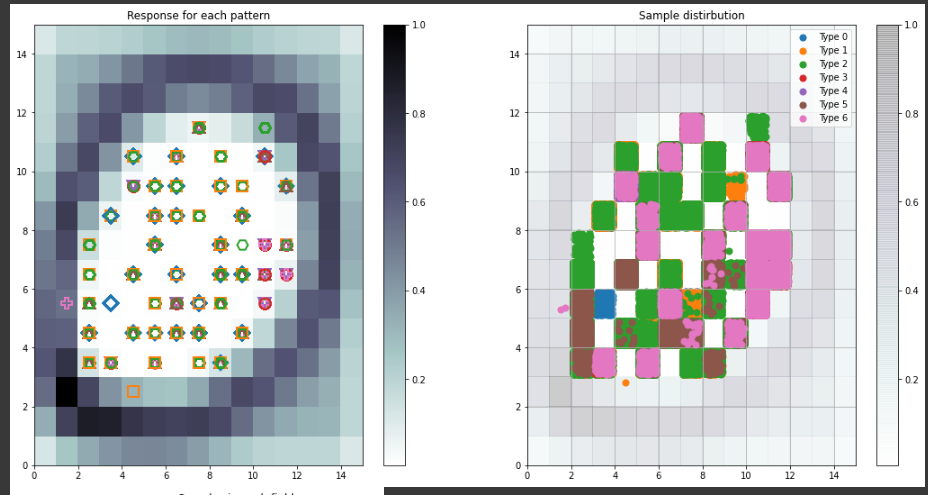

Dlatego zdecydowaliśmy się na wzięcie losowego podzbioru zawierającego 1000 rekordów, aby wyniki były bardziej przejrzyste i możliwe do obliczenia.

In [ ]:
# sieć SOM dla covtype:
covtype_labels = {0: 'Type 0', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4', 5: 'Type 5', 6: 'Type 6'}
covtype_colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
covtype_markers = ['D', 's', 'H', "o", "v", "^", "P"]

covtype_SOM_target = covtype_y_train_noOHE[:1000]
covtype_SOM_data = covtype_X_train[:1000]

# hand-sellected map size - all samples fit within it anyway, and icreasing it only increases empty space around
covtype_mapSize = 15
print(f'creating map with width: {covtype_mapSize}')
covtype_SOM_model = MiniSom(covtype_mapSize, covtype_mapSize, covtype_SOM_data.shape[1], sigma=1.5, learning_rate=.5,
                            neighborhood_function='gaussian', random_seed=0)

# prepare and train model
covtype_SOM_model.pca_weights_init(covtype_SOM_data)
covtype_SOM_model.train(covtype_SOM_data, 1000, verbose=True)


creating map with width: 15
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.002666261567109855


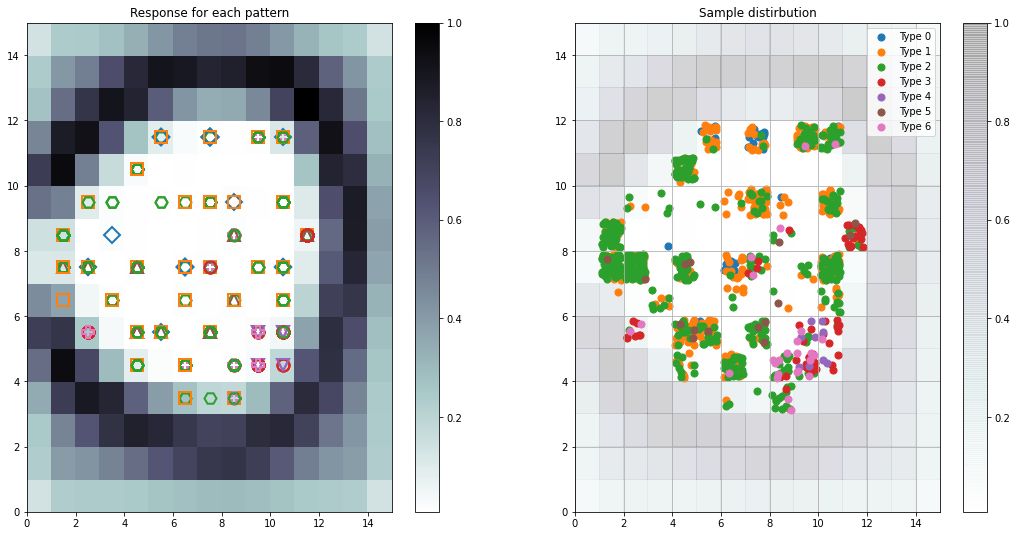

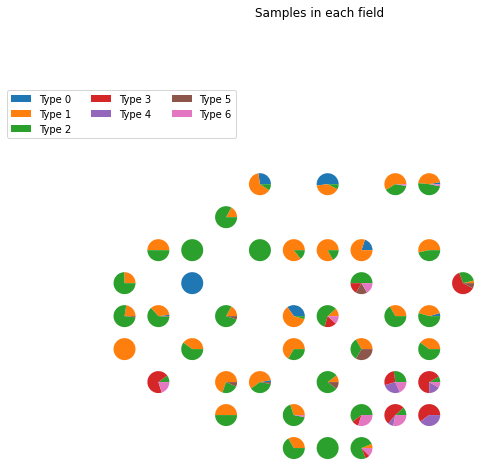

In [ ]:
plt.figure(figsize=(18, 9))

# The response for each pattern in the dataset - different colors and markers for each label
plt.subplot(1, 2, 1)
plt.pcolor(covtype_SOM_model.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title('Response for each pattern')
for cnt, xx in enumerate(covtype_SOM_data):
    w = covtype_SOM_model.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, covtype_markers[covtype_SOM_target[cnt]], markerfacecolor='None',
             markeredgecolor=covtype_colors[covtype_SOM_target[cnt]], markersize=12, markeredgewidth=2)


# Sample distirbution - each dot represents the coordinates of the winning neuron.
# A random offset is added to avoid overlaps between points within the same cell.
plt.subplot(1, 2, 2)
plt.title('Sample distirbution')
w_x, w_y = zip(*[covtype_SOM_model.winner(d) for d in covtype_SOM_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.pcolor(covtype_SOM_model.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(covtype_SOM_target):
    idx_target = covtype_SOM_target == c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=covtype_colors[c], label=covtype_labels[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()


# Pie-chart distribution.
labels_map = covtype_SOM_model.labels_map(covtype_SOM_data, [covtype_labels[t] for t in covtype_SOM_target])
the_grid = gridspec.GridSpec(covtype_mapSize, covtype_mapSize,plt.figure(figsize=(9, 9)))
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in covtype_labels.values()]
    plt.subplot(the_grid[covtype_mapSize-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
    
plt.suptitle('Samples in each field')
plt.legend(patches, covtype_labels.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()

Jak widać, dla datasetu "covtype", wszystkie sample są ułożone dosyć gęsto na małej przestrzeni.  
  
Według biblioteki minisom, zazwyczaj odpowiednia jest mapa o ilości pól równej 5-ciokrotności pierwiastka z ilości sampli. Jednak ten dataset zawiera 580 tysięcy sampli, co odpowiadałoby wymiarom 62x62, jednak próba utworzenia tekiej mapy powoduje crash związany z brakiem dostępnej pamięci RAM. Poza tym, jak widać na wykresie, wszystkie sample spokojnie mieszczą się w mapie 15x15, i zwiększenie wymiarów powoduje tylko dodanie pustej przestrzeni dookoła, bez zmian rozmieszczenia.

Jak widać na wykresach, większość pól nie jest w stanie określić jednej klasy, która odpowiadałaby wszystkim przypisanym im samplom.

Label prediction accuracy: 0.594


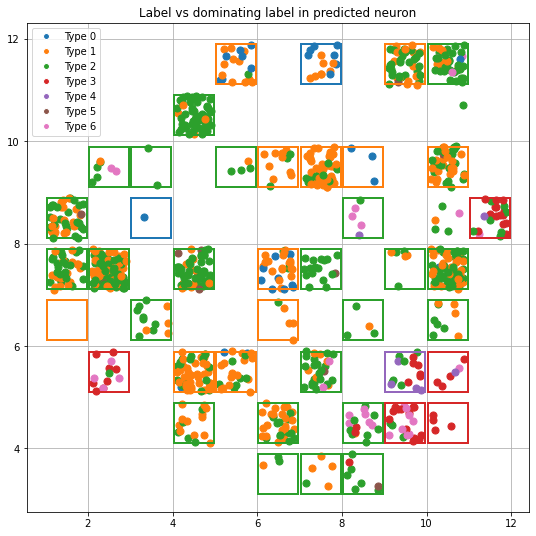

In [ ]:
# measure accuracy
labels_map = covtype_SOM_model.labels_map(covtype_SOM_data, [covtype_labels[t] for t in covtype_SOM_target])


def getLabel(labels_map, neuron_coords):
    ctr = labels_map.get(neuron_coords)
    if ctr is None:
        return None
    return ctr.most_common(1)[0][0]


def isLabelMatching(labels_map, neuron_coords, label):
    lb2 = getLabel(labels_map, neuron_coords)
    if lb2 is None:
        return False
    return lb2 == label


# draw sqare of winner color in each field
plt.figure(figsize=(9, 9))
for i, value in enumerate(covtype_SOM_data):
    winner = covtype_SOM_model.winner(value)
    label = covtype_labels.get(covtype_SOM_target[i])
    if not isLabelMatching(labels_map, winner, label):
        continue
    plt.plot(winner[0]+.5, winner[1]+.5, 's', markerfacecolor='None',
             markeredgecolor=covtype_colors[covtype_SOM_target[i]], markersize=40, markeredgewidth=2)


# draw scatterplot of test set
correctCount = 0
for i, value in enumerate(covtype_X_test[:1000]):
    label = covtype_labels.get(covtype_y_test_noOHE[:1000][i])
    winner = covtype_SOM_model.winner(value)
    if isLabelMatching(labels_map, winner, label):
        correctCount += 1
    plt.scatter(winner[0]+.5 + ((np.random.uniform(0, 1)-.5)*.8),
                winner[1]+.5 + ((np.random.uniform(0, 1)-.5)*.8),
                s=50, c=covtype_colors[covtype_y_test_noOHE[:1000][i]])
accuracy = correctCount/len(covtype_X_test[:1000])
# +.5+(np.random.rand(np.sum(idx_target))-.5)*.8
print(f'Label prediction accuracy: {accuracy}')


legendComp = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                     markerfacecolor=col, lw=4) for col in covtype_colors]
plt.legend(legendComp, [covtype_labels.get(i) for i in range(len(covtype_labels))])
plt.grid()
plt.title('Label vs dominating label in predicted neuron')
plt.show()


Powyższy wykres przedstawia pola, z ramką o kolorze dominującej w nich klasy, wraz z samplami ze zbioru testowego zaklasifykowanymi przez sieć SOM.  

Jak widać, klasyfikacja jest częściowo poprawna, jednak nie w dużym stopniu.

### Sieć SOM dla datasetu *credit*:

In [6]:
# sieć SOM dla credit:
credit_labels = {0: 'No', 1: 'Yes'}
credit_colors = ['C0', 'C1']
credit_markers = ['D', 's']

credit_SOM_target = credit_y_train_noOHE
credit_SOM_data = credit_X_train

credit_mapSize = math.ceil(np.sqrt(5*np.sqrt(len(credit_SOM_target))))  # rule of thumb for SOM dimentions: 5*sqrt(samples_size)
print(f'creating map with width: {credit_mapSize}')
credit_SOM_model = MiniSom(credit_mapSize, credit_mapSize, credit_SOM_data.shape[1], sigma=1.5, learning_rate=.5,
                           neighborhood_function='gaussian', random_seed=0)

# prepare and train model
credit_SOM_model.pca_weights_init(credit_SOM_data)
credit_SOM_model.train(credit_SOM_data, 1000, verbose=True)

creating map with width: 11
 [  242 / 1000 ]  24% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.10546928723121099


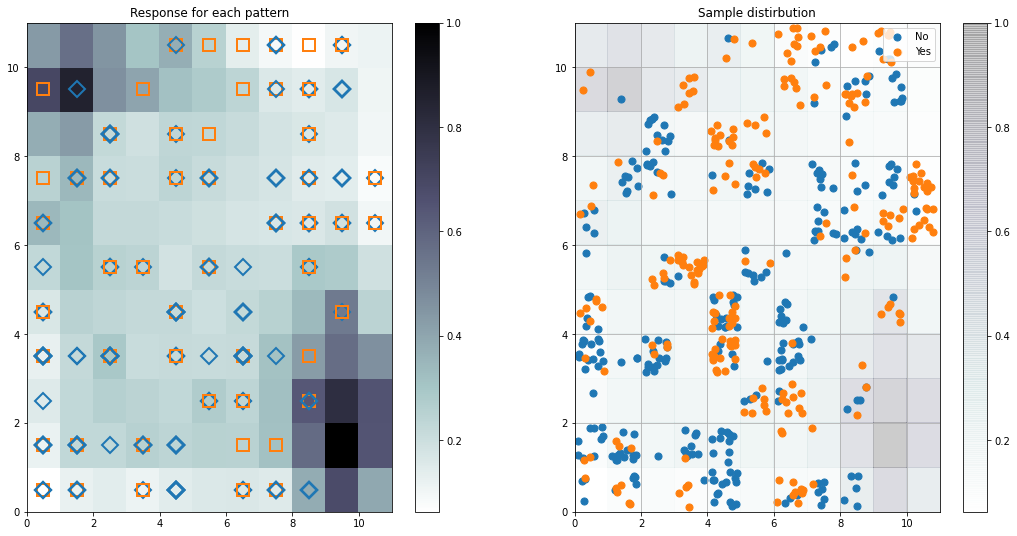

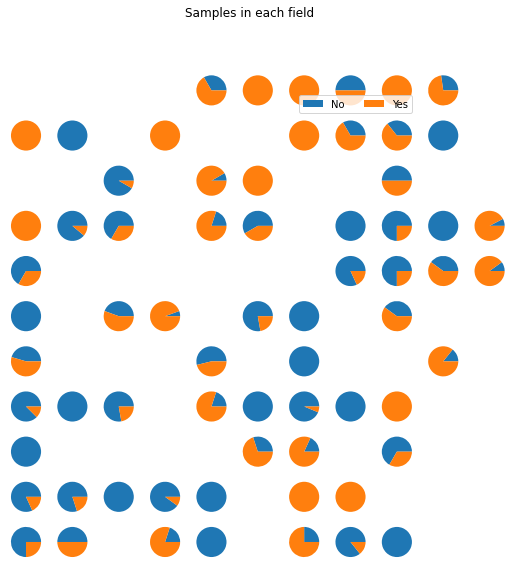

In [7]:
plt.figure(figsize=(18, 9))

# The response for each pattern in the dataset - different colors and markers for each label
plt.subplot(1, 2, 1)
plt.pcolor(credit_SOM_model.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title('Response for each pattern')
for cnt, xx in enumerate(credit_SOM_data):
    w = credit_SOM_model.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, credit_markers[credit_SOM_target[cnt]], markerfacecolor='None',
             markeredgecolor=credit_colors[credit_SOM_target[cnt]], markersize=12, markeredgewidth=2)


# Sample distirbution - each dot represents the coordinates of the winning neuron.
# A random offset is added to avoid overlaps between points within the same cell.
plt.subplot(1, 2, 2)
plt.title('Sample distirbution')
w_x, w_y = zip(*[credit_SOM_model.winner(d) for d in credit_SOM_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.pcolor(credit_SOM_model.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(credit_SOM_target):
    idx_target = credit_SOM_target == c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=credit_colors[c], label=credit_labels[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()


# Pie-chart distribution.
labels_map = credit_SOM_model.labels_map(credit_SOM_data, [credit_labels[t] for t in credit_SOM_target])
the_grid = gridspec.GridSpec(credit_mapSize, credit_mapSize, plt.figure(figsize=(9, 9)))
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in credit_labels.values()]
    plt.subplot(the_grid[credit_mapSize-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, credit_labels.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.suptitle('Samples in each field')
plt.show()


Jak widać, w dla tego datasetu, wyniki sieci SOM są dużo lepsze, na wykresie "Response for each pattern" widać wyraźnie pola, w których występuje wyłącznie jeden typ odpowiedzi, a na wykresie "Sample distribiution" widać wyraźne klastry tworzące się w różnych miejscach.

Rozmiar mapy 12x12, zalecany przez bibliotekę minisom, w tym przypadku doskonale odpowiada dystrybucji elementów.

Label prediction accuracy: 0.7099236641221374


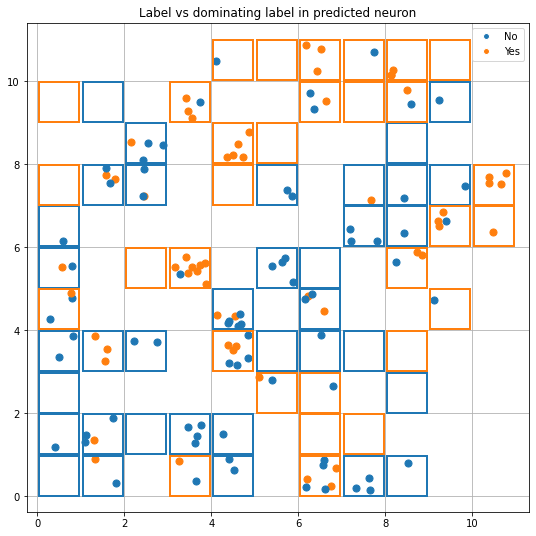

In [8]:
# measure accuracy
labels_map = credit_SOM_model.labels_map(credit_SOM_data, [credit_labels[t] for t in credit_SOM_target])


def getLabel(labels_map, neuron_coords):
    ctr = labels_map.get(neuron_coords)
    if ctr is None:
        return None
    return ctr.most_common(1)[0][0]


def isLabelMatching(labels_map, neuron_coords, label):
    lb2 = getLabel(labels_map, neuron_coords)
    if lb2 is None:
        return False
    return lb2 == label


# draw sqare of winner color in each field
plt.figure(figsize=(9, 9))
for i, value in enumerate(credit_SOM_data):
    winner = credit_SOM_model.winner(value)
    label = credit_labels.get(credit_SOM_target[i])
    if not isLabelMatching(labels_map, winner, label):
        continue
    plt.plot(winner[0]+.5, winner[1]+.5, 's', markerfacecolor='None',
             markeredgecolor=credit_colors[credit_SOM_target[i]], markersize=40, markeredgewidth=2)


# draw scatterplot of test set
correctCount = 0
for i, value in enumerate(credit_X_test):
    label = credit_labels.get(credit_y_test_noOHE[i])
    winner = credit_SOM_model.winner(value)
    if isLabelMatching(labels_map, winner, label):
        correctCount += 1
    plt.scatter(winner[0]+.5 + ((np.random.uniform(0, 1)-.5)*.8),
                winner[1]+.5 + ((np.random.uniform(0, 1)-.5)*.8),
                s=50, c=credit_colors[credit_y_test_noOHE[i]])
accuracy = correctCount/len(credit_X_test)
# +.5+(np.random.rand(np.sum(idx_target))-.5)*.8
print(f'Label prediction accuracy: {accuracy}')


legendComp = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                     markerfacecolor=col, lw=4) for col in credit_colors]
plt.legend(legendComp, [credit_labels.get(i) for i in range(len(credit_labels))])
plt.grid()
plt.title('Label vs dominating label in predicted neuron')
plt.show()


Powyższy wykres przedstawia pola, z ramką o kolorze dominującej w nich klasy, wraz z samplami ze zbioru testowego zaklasifykowanymi przez sieć SOM.  

Jak widać, w tym wypadku klasyfikacja jest dokładniejsza.

# **G. Podsumowanie**

## Porównanie datasetów

Sieć FFNN zdaje się lepiej działać dla datasetu "credit", niż dla "covtype". Prawdopodobnie wynika to z masywnej różnycy w ilości danych (ok. 580 tysięcy vs ok. 700). Dane "covtype", po rozwinięciu kolumn kategorycznych do kodowania OHE, zawiera także trochę więcej  kolumn (53 vs 46).

Tak samo sieć SOM, jest dużo czytelniejsza oraz posiada lepszą dokładność dla datasetu "credit". W tym wypadku, nawet nie podaliśmy sieci pełnych danych z datasetu "covtype", jedynie losowe 1000, ponieważ przy tak olbrzymiej ilości danych wykresy stawały się całkowicie nieczytelnie.

Na pierwszy rzut oka, wydaje się że sieć SOM działa dużo lepiej dla datasetu "credit", jednak po przyjrzeniu się dokładności zmierzonej za pomocą zbioru testowego, widać, że jest to różnica między 70% a 60%, więc jest to różnica na pewno zauważalna, ale nie tak ogromna na mogłoby się wydawać patrząc jedynie na wykresy.

Dataset "credit" polega na przewidzeniu jednej z dwóch klas, podczas gdy "covtype" ma ich aż 7. Powoduje to, że krzywą ROC można utworzyć tylko dla datasetu "credit".

## Porównanie sieci

Sieci FFNN, na pewno radzą sobie dużo lepiej przy klasyfikacji, niż sieci SOM, wynika to z prostej przyczyny, że dla sieci FFNN klasyfikacja jest ich głównym i jedynym zadaniem, a sieć SOM skupia się bardziej na pogrupowaniu danych w podobne sobie klastry.

Dla datasetu "covtype" sieć FFNN na pewno funkcjonuje o wiele lepiej, ponieważ ze względu na setki tysięcy danych, sieć SOM nie jest w stanie czytelnie rozłożyć ich na wykresie. 

## Dodatkowe uwagi

Początkowo One-Hot-Encoding dla datasetu był zrobiony błędnie, ponieważ zastosowaliśmy go tylko dla kolumn kategorycznych z 3 lub więcej kategoriami.  
Po uświadomieniu sobie tego błędu na dzisiejszych zajęciach, i zastosowaniu OHE także dla kolumn z 2 kategoriami, nie udało nam się poprawić dokładności uzyskanej przez najlepszą sieć FFNN dla tego datasetu (dalej w okolicach 90%), jednak struktura sieci dającej najlepsze wyniki dramatycznie się uprościła (4 warstwy po 500 -> 1 warstwa z 50 neuronów). Także sieć SOM po poprawieniu danych daje zauważalnie lepsze wyniki, dokładność klasyfikacji zbioru testowego wzrosła z 65% do 70%.